# **Phase portraits of 2D linear systems**

Import the modules needed below

In [161]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

A function returning the eigenvalues and eigenvectors will be useful 

In [162]:
def get_eigen(_A):
    eigval, eigvec = np.linalg.eig(_A(0, 0))
    l1 = eigval[0]
    l2 = eigval[1]
    v1=np.array(np.transpose(eigvec[:,0]))
    v2=np.array(np.transpose(eigvec[:,1]))
    return l1,l2,v1,v2

as well as a function plotting the vector field using `streamplot`

In [163]:
def plot_vector_field(_xlims, _ylims):
    xlo = _xlims[0]
    xhi = _xlims[1]
    ylo = _ylims[0]
    yhi = _ylims[1]
    XX, YY = np.meshgrid(np.arange(xlo,xhi,0.01), np.arange(ylo,yhi,0.01))
    DX, DY = V([XX, YY], 0)
    plt.streamplot(XX,YY,DX,DY,color='darkcyan',density=1.,minlength=0.2,linewidth=2,arrowsize=2.5)

## Stable node

Consider the following equations
$$
\left\lbrace
\begin{align}
\dot{x} &= y \\
\dot{y} &= -2x -3y
\end{align}
\right.
$$

The associated matrix is
$$
A = \left(
\begin{matrix}
0 & 1 \\
-2 & -3
\end{matrix}
\right)
$$

Therefore
$$
\begin{align}
&\Delta = 2 > 0 \\
&\tau = -3 < 0 \\
&\tau^2 - 4\Delta = 1 > 0
\end{align}
$$

This indicates the fixed point corresponds to a *stable node*.

In [164]:
# Vector field
def V(z, t):
    x = z[0]
    y = z[1]
    dxdt = y
    dydt = - 2*x - 3*y
    return [dxdt, dydt]

# Associated matrix
def A(x,y):
    return np.matrix([[0,1],[-2,-3]])

In [165]:
# Get the eigenvalues and eigenvectors
l1,l2,v1,v2 = get_eigen(A)

x=np.linspace(-0.5,0.5,100)
# Manifolds
y1=(v1[0,1]/v1[0,0])*x
y2=(v2[0,1]/v2[0,0])*x
# Nulclines
y3=(-2./3)*x
y4=0.0*x

Text(0, 0.5, 'y')

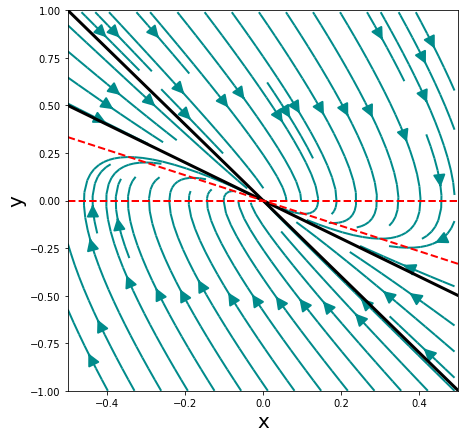

In [166]:
#Plot
plt.figure(figsize=(7,7))
plot_vector_field([-.5,.5],[-1.,1.])
plt.plot(x, y1,'k',lw=3)
plt.plot(x, y2,'k',lw=3)
plt.plot(x, y3,'r',lw=2,ls='--')
plt.plot(x, y4,'r',lw=2,ls='--')
plt.xlim([-0.5,0.5])
plt.ylim([-1.0,1.0])
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)

## Unstable spiral

Consider the following equations
$$
\left\lbrace
\begin{align}
\dot{x} &= 5x + 10y \\
\dot{y} &= -x - y
\end{align}
\right.
$$

The associated matrix is
$$
A = \left(
\begin{matrix}
5 & 10 \\
-1 & -1
\end{matrix}
\right)
$$

Therefore
$$
\begin{align}
&\Delta = 5 > 0 \\
&\tau = 4 > 0 \\
&\tau^2 - 4\Delta = -4 < 0
\end{align}
$$

This indicates the fixed point corresponds to a *unstable spiral*.

### Phase portrait using `streamplot`

In [167]:
# Vector field
def V(z, t):
    x = z[0]
    y = z[1]
    dxdt = 5*x + 10*y
    dydt = - x - y
    return [dxdt, dydt]

# Associated matrix
def A(x,y):
    return np.matrix([[5,10],[-1,-1]])

In [168]:
# Get the eigenvalues and eigenvectors
l1,l2,v1,v2 = get_eigen(A)

x=np.linspace(xlo,xhi,100)
# Manifolds
y1=(v1[0,1]/v1[0,0])*x
y2=(v2[0,1]/v2[0,0])*x
# Nulclines
y3=(-1./2)*x
y4=-x

Text(0, 0.5, 'y')

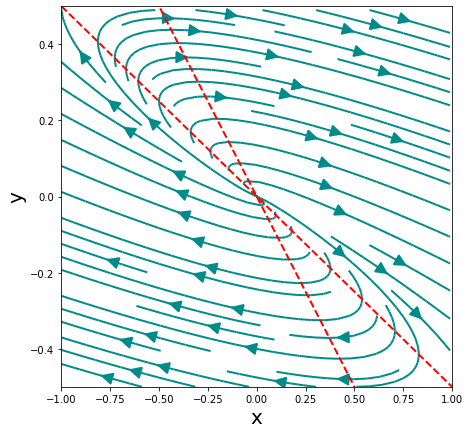

In [169]:
#Plot
plt.figure(figsize=(7,7))
xlo = -1.0
xhi = 1.0
ylo = -0.5
yhi = 0.5
plot_vector_field([xlo,xhi],[ylo,yhi])
plt.plot(x, y3,'r',lw=2,ls='--')
plt.plot(x, y4,'r',lw=2,ls='--')
plt.xlim([xlo,xhi])
plt.ylim([ylo,yhi])
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)

### Phase portrait using `quiver`

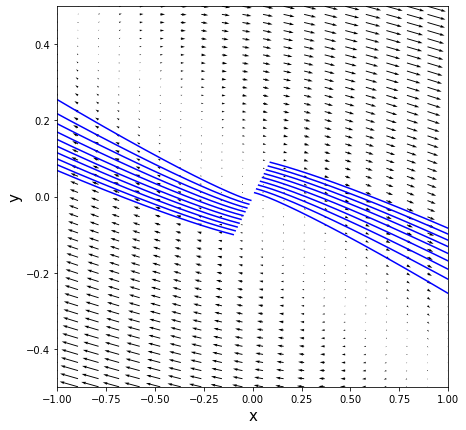

In [170]:
plt.figure(figsize=(7,7))

# Flow with quiver
x_grid, y_grid= np.meshgrid(np.linspace(xlo, xhi, 20),np.linspace(ylo, yhi, 24*2))
dx_grid = 5 * x_grid + 10 * y_grid
dy_grid = - x_grid - y_grid
plt.quiver(x_grid, y_grid, dx_grid, dy_grid, color='k', angles='xy')

# Curves with odeint
ti = 0.
tf = 10.
dt = 1./100
t = np.arange(ti, tf, dt)
Xi = np.arange(-0.1,0.1,0.01)
Yi = np.arange(-0.1,0.1,0.01)
Zi = [[Xi,Yi] for Xi,Yi in zip(Xi,Yi)]
for zi in Zi:
    z = odeint(V, zi, t)
    xt = z[:, 0]
    yt = z[:, 1]
    plt.plot(xt, yt,c='b')

# Format
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xlim([xlo,xhi])
plt.ylim([ylo,yhi])
plt.show()


## Unstable degenerate node

Consider the following equations
$$
\left\lbrace
\begin{align}
\dot{x} &= 3x - 4y \\
\dot{y} &= x - y
\end{align}
\right.
$$

The associated matrix is
$$
A = \left(
\begin{matrix}
3 & -4 \\
1 & -1
\end{matrix}
\right)
$$

Therefore
$$
\begin{align}
&\Delta = 1 > 0 \\
&\tau = 2 > 0 \\
&\tau^2 - 4\Delta = 0
\end{align}
$$

This indicates the fixed point corresponds to either a *star* or a *degenerate node*.

In [207]:
def V(z, t):
    x = z[0]
    y = z[1]
    dxdt = 3*x - 4*y
    dydt = x - y
    return [dxdt, dydt]

def A(x,y):
    return np.matrix([[3,-4],[1,-1]])

In [208]:
l1,l2,v1,v2 = get_eigen(A)
print(l1,v1)
print(l2,v2)

x=np.linspace(xlo,xhi,100)
y1=(v1[0,1]/v1[0,0])*x
y2=(v2[0,1]/v2[0,0])*x
y3=(3./4)*x
y4=x

1.0 [[0.89442719 0.4472136 ]]
1.0 [[0.89442719 0.4472136 ]]


The eigenvalue is positive and there is only one eigenvector, therefore the fixed point must correspond to an *unstable degenerate node*.

Text(0, 0.5, 'y')

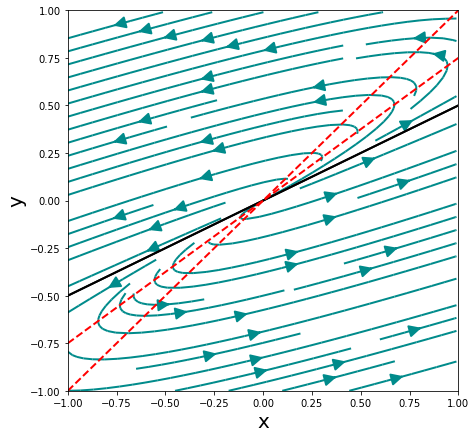

In [209]:
plt.figure(figsize=(7,7))
xlo = -1
xhi = 1
ylo = -1
yhi = 1
plot_vector_field([xlo,xhi],[ylo,yhi])
plt.plot(x, y1,'k',lw=2)
plt.plot(x, y2,'k',lw=2)
plt.plot(x, y3,'r',lw=2,ls='--')
plt.plot(x, y4,'r',lw=2,ls='--')
plt.xlim([xlo,xhi])
plt.ylim([ylo,yhi])
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)

## Center

Consider the following equations
$$
\left\lbrace
\begin{align}
\dot{x} &= 5x + 2y \\
\dot{y} &= -17x - 5y
\end{align}
\right.
$$

The associated matrix is
$$
A = \left(
\begin{matrix}
5 & 2 \\
-17 & -5
\end{matrix}
\right)
$$

Therefore
$$
\begin{align}
&\Delta = 9 > 0 \\
&\tau = 0 \\
&\tau^2 - 36\Delta = 0
\end{align}
$$

This indicates the fixed point is *non-isolated*, i.e. either a *center* or a *spiral*.

In [210]:
def V(z, t):
    x = z[0]
    y = z[1]
    dxdt = 5*x + 2*y
    dydt = -17*x - 5*y
    return [dxdt, dydt]

def A(x,y):
    return np.matrix([[5,2],[-17,-5]])

In [212]:
l1,l2,v1,v2 = get_eigen(A)
print(l1,v1)
print(l2,v2)

x=np.linspace(xlo,xhi,100)
y1=(v1[0,1]/v1[0,0])*x
y2=(v2[0,1]/v2[0,0])*x
y3=(-5./2)*x
y4=(-17./5)*x

(-3.885780586188048e-16+2.9999999999999996j) [[-0.27820744-0.16692447j  0.9459053 +0.j        ]]
(-3.885780586188048e-16-2.9999999999999996j) [[-0.27820744+0.16692447j  0.9459053 -0.j        ]]


The eigenvalue is complex with real part equal to zero (numerically), therefore the fixed point must correspond to a *center*.

Text(0, 0.5, 'y')

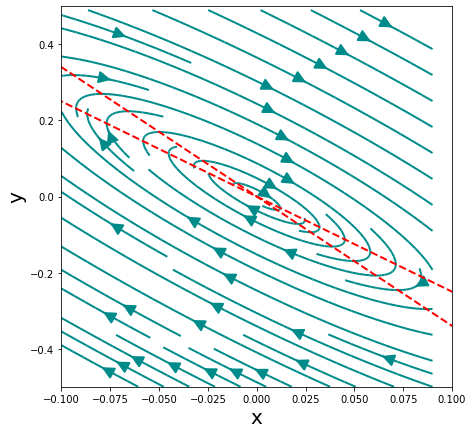

In [218]:
plt.figure(figsize=(7,7))
xlo = -.1
xhi = .1
ylo = -.5
yhi = .5
plot_vector_field([xlo,xhi],[ylo,yhi])
plt.plot(x, y3,'r',lw=2,ls='--')
plt.plot(x, y4,'r',lw=2,ls='--')
plt.xlim([xlo,xhi])
plt.ylim([ylo,yhi])
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)

### Phase portrait using `quiver`

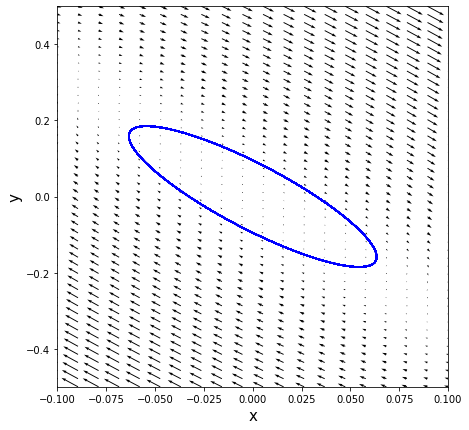

In [225]:
plt.figure(figsize=(7,7))

# Flow with quiver
x_grid, y_grid= np.meshgrid(np.linspace(xlo, xhi, 20),np.linspace(ylo, yhi, 24*2))
dx_grid = 5 * x_grid + 2 * y_grid
dy_grid = - 17 * x_grid - 5 * y_grid
plt.quiver(x_grid, y_grid, dx_grid, dy_grid, color='k', angles='xy')

# Curves with odeint
ti = 0.
tf = 100.
dt = 1./100
t = np.arange(ti, tf, dt)
xi = 0.025
yi = 0.025
zi = [xi,yi]
z = odeint(V, zi, t)
xt = z[:, 0]
yt = z[:, 1]
plt.plot(xt, yt,c='b')

# Format
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xlim([xlo,xhi])
plt.ylim([ylo,yhi])
plt.show()
